# IE 582 HW5 (OPTIONAL)
### Egecan Esen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

Question 1 (30 points)

Use the UWave data provided in the second homework for this exercise. In the second homework, you were
given only the training data. For this homework, you are asked to perform classification task on the test
data and evaluate the performance of certain classifiers. Test data is uploaded for each axis (i.e. X, Y and
Z). It has the same format as the training data.

The dataset is provided in the following link:
https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm 

In [2]:
X_TRAIN = pd.read_csv("uWaveGestureLibrary_X_TRAIN", header=None, delim_whitespace=True, dtype=float)
Y_TRAIN = pd.read_csv("uWaveGestureLibrary_Y_TRAIN", header=None, delim_whitespace=True, dtype=float)
Z_TRAIN = pd.read_csv("uWaveGestureLibrary_Z_TRAIN", header=None, delim_whitespace=True, dtype=float)

X_TEST = pd.read_csv("uWaveGestureLibrary_X_TEST", header=None, delim_whitespace=True, dtype=float)
Y_TEST = pd.read_csv("uWaveGestureLibrary_Y_TEST", header=None, delim_whitespace=True, dtype=float)
Z_TEST = pd.read_csv("uWaveGestureLibrary_Z_TEST", header=None, delim_whitespace=True, dtype=float)

In [3]:
X_TRAIN.rename(columns = {0:'class'}, inplace = True) 
Y_TRAIN.rename(columns = {0:'class'}, inplace = True) 
Z_TRAIN.rename(columns = {0:'class'}, inplace = True)

X_TEST.rename(columns = {0:'class'}, inplace = True) 
Y_TEST.rename(columns = {0:'class'}, inplace = True) 
Z_TEST.rename(columns = {0:'class'}, inplace = True) 

In [4]:
X_TRAIN.columns = X_TRAIN.columns.map(lambda x: "X_" + str(x) if isinstance(x, int) else x)
Y_TRAIN.columns = Y_TRAIN.columns.map(lambda x: "Y_" + str(x) if isinstance(x, int) else x)
Z_TRAIN.columns = Z_TRAIN.columns.map(lambda x: "Z_" + str(x) if isinstance(x, int) else x)

X_TEST.columns = X_TEST.columns.map(lambda x: "X_" + str(x) if isinstance(x, int) else x)
Y_TEST.columns = Y_TEST.columns.map(lambda x: "Y_" + str(x) if isinstance(x, int) else x)
Z_TEST.columns = Z_TEST.columns.map(lambda x: "Z_" + str(x) if isinstance(x, int) else x)

In [5]:
TRAIN = pd.concat([X_TRAIN,Y_TRAIN.iloc[:,1:],Z_TRAIN.iloc[:,1:]],1)
TEST = pd.concat([X_TEST,Y_TEST.iloc[:,1:],Z_TEST.iloc[:,1:]],1)

In [6]:
y_train = TRAIN["class"]
X_train = TRAIN.drop("class",1)

y_test = TRAIN["class"]
X_test = TRAIN.drop("class",1)

a) Suppose we decided to apply a nearest-neighbor (NN) classifier to find the labels of test instances. Propose two distance measures for computing similarity between two time series. For each distance
measure alternative, use the training data to identify the optimal value of k which minimizes the error of
a 10-fold cross-validation.

b) Using the value of k (identified for each distance measure) in part (b) and evaluate your final performance
on the test data and present your results in a (8-by-8) confusion matrix, showing the counts for actual
and predicted labels. In addition, quote the runtime and accuracy for your results.

The first distance measure I propose is using minkowski distance to calculate the distance between each column.

I don't know what value for p will give the best result, but we can try to search some values.

The second distance measure I propose is correlation between two time series.

I think these will be an effective methods, however we need some scaling first.

I will be using StandardScaler.

In [7]:
mink_pipe = Pipeline(steps=(('scaler',StandardScaler()), ('model',KNeighborsClassifier(metric="minkowski"))))

corr_pipe = Pipeline(steps=(('scaler',StandardScaler()), ('model',KNeighborsClassifier(metric="correlation"))))

In [8]:
mink_parameters = {'model__n_neighbors':list(np.linspace(1,20,20, dtype=int)), 'model__p':[1, 1.64, 2, 3]}

mink_grid = GridSearchCV(estimator=mink_pipe, param_grid=mink_parameters, cv=10, verbose=5, n_jobs=-1)

mink_grid.fit(X_train, y_train)

print("minkowski distance best parameters: ", mink_grid.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min


minkowski distance best parameters:  {'model__n_neighbors': 1, 'model__p': 1}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.2min finished


In [9]:
mink_results = pd.DataFrame(mink_grid.cv_results_)
mink_results[mink_results["rank_test_score"]<=10]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.100093      0.011334         0.150519        0.006382   
1        0.077792      0.020204         2.399456        0.061131   
8        0.065140      0.003802         0.137074        0.004623   
9        0.062999      0.003205         2.271475        0.024098   
12       0.062528      0.002613         0.136248        0.003310   
13       0.061381      0.003130         2.291586        0.024102   
16       0.063714      0.002908         0.137380        0.005108   
17       0.063974      0.001769         2.288398        0.023337   
20       0.063020      0.002559         0.137766        0.003346   
24       0.064625      0.003566         0.138997        0.003243   

   param_model__n_neighbors param_model__p  \
0                         1              1   
1                         1           1.64   
8                         3              1   
9                         3           1.64   
12                        4              1   
13                        4           1.64   
16                        5              1   
17                        5           1.64   
20                        6              1   
24                        7              1   

                                         params  split0_test_score  \
0      {'model__n_neighbors': 1, 'model__p': 1}           0.933333   
1   {'model__n_neighbors': 1, 'model__p': 1.64}           0.933333   
8      {'model__n_neighbors': 3, 'model__p': 1}           0.955556   
9   {'model__n_neighbors': 3, 'model__p': 1.64}           0.944444   
12     {'model__n_neighbors': 4, 'model__p': 1}           0.944444   
13  {'model__n_neighbors': 4, 'model__p': 1.64}           0.944444   
16     {'model__n_neighbors': 5, 'model__p': 1}           0.955556   
17  {'model__n_neighbors': 5, 'model__p': 1.64}           0.966667   
20     {'model__n_neighbors': 6, 'model__p': 1}           0.955556   
24     {'model__n_neighbors': 7, 'model__p': 1}           0.966667   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.988889           0.977778           0.988889   
1            0.955556           0.966667           0.966667   
8            0.988889           0.977778           0.955556   
9            0.977778           0.955556           0.966667   
12           0.977778           0.977778           0.966667   
13           0.966667           0.966667           0.944444   
16           0.977778           0.966667           0.955556   
17           0.977778           0.955556           0.944444   
20           0.988889           0.977778           0.966667   
24           0.977778           0.966667           0.977778   

    split4_test_score  split5_test_score  split6_test_score  \
0            0.922222           0.911111           0.955056   
1            0.911111           0.888889           0.932584   
8            0.911111           0.922222           0.910112   
9            0.900000           0.922222           0.910112   
12           0.900000           0.911111           0.910112   
13           0.900000           0.911111           0.910112   
16           0.900000           0.911111           0.898876   
17           0.888889           0.888889           0.910112   
20           0.900000           0.888889           0.898876   
24           0.888889           0.877778           0.898876   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0            0.955056           0.977528           0.977528         0.958739   
1            0.943820           0.977528           0.977528         0.945368   
8            0.966292           0.966292           1.000000         0.955381   
9            0.966292           0.955056           0.966292         0.946442   
12           0.955056           0.977528           0.988764         0.950924   
13           0.966292           0.977528           0.977528         0.946479   
16           0.966292        

In [10]:
corr_parameters = {'model__n_neighbors':list(np.linspace(1,20,20, dtype=int))}

corr_grid = GridSearchCV(estimator=corr_pipe, param_grid=corr_parameters, cv=10, verbose=5, n_jobs=-1)

corr_grid.fit(X_train, y_train)

print("correlation distance best parameters: ", corr_grid.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.4s


correlation distance best parameters:  {'model__n_neighbors': 1}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


In [11]:
corr_results = pd.DataFrame(corr_grid.cv_results_)
corr_results[corr_results["rank_test_score"]<=10]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.054442      0.005354         0.151310        0.016524   
1       0.043934      0.005112         0.125856        0.010647   
2       0.045985      0.008885         0.118116        0.004621   
3       0.047312      0.002588         0.121518        0.004448   
4       0.046803      0.003074         0.122041        0.004371   
5       0.046590      0.002436         0.124382        0.005917   
6       0.046213      0.003699         0.126798        0.004966   
7       0.047912      0.003939         0.119903        0.002031   
8       0.043830      0.002292         0.121429        0.003642   
9       0.047210      0.003056         0.119938        0.001762   

  param_model__n_neighbors                      params  split0_test_score  \
0                        1   {'model__n_neighbors': 1}           0.933333   
1                        2   {'model__n_neighbors': 2}           0.922222   
2                        3   {'model__n_neighbors': 3}           0.944444   
3                        4   {'model__n_neighbors': 4}           0.933333   
4                        5   {'model__n_neighbors': 5}           0.944444   
5                        6   {'model__n_neighbors': 6}           0.933333   
6                        7   {'model__n_neighbors': 7}           0.944444   
7                        8   {'model__n_neighbors': 8}           0.944444   
8                        9   {'model__n_neighbors': 9}           0.955556   
9                       10  {'model__n_neighbors': 10}           0.944444   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.944444           0.977778           0.966667           0.911111   
1           0.933333           0.977778           0.955556           0.911111   
2           0.966667           0.955556           0.966667           0.888889   
3           0.977778           0.966667           0.955556           0.888889   
4           0.955556           0.955556           0.955556           0.888889   
5           0.955556           0.977778           0.955556           0.855556   
6           0.966667           0.966667           0.955556           0.866667   
7           0.966667           0.955556           0.966667           0.844444   
8           0.955556           0.955556           0.966667           0.855556   
9           0.944444           0.966667           0.955556           0.855556   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.900000           0.932584           0.955056           0.943820   
1           0.922222           0.910112           0.943820           0.943820   
2           0.922222           0.910112           0.955056           0.955056   
3           0.900000           0.910112           0.966292           0.955056   
4           0.900000           0.910112           0.966292           0.966292   
5           0.888889           0.910112           0.955056           0.955056   
6           0.888889           0.887640           0.943820           0.966292   
7           0.888889           0.876404           0.955056           0.943820   
8           0.888889           0.876404           0.955056           0.955056   
9           0.877778           0.876404           0.955056           0.955056   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.966292         0.943109        0.023512                1  
1           0.977528         0.939750        0.023474                5  
2           0.966292         0.943096        0.025602                2  
3           0.966292         0.941998        0.030166                4  
4           0.977528         0.942022        0.029328                3  
5           0.977528         0.936442        0.037851                6  
6           0.966292         0.935293        0.036866                7  
7           0.966292         0.930824        0.04

In [12]:
%%time
best_mink = mink_grid.best_estimator_
best_mink.fit(X_train, y_train)
mink_prediction = best_mink.predict(X_test)
confusion_matrix(y_test, mink_prediction)

CPU times: user 172 ms, sys: 7.07 ms, total: 179 ms
Wall time: 178 ms


array([[122,   0,   0,   0,   0,   0,   0,   0],
       [  0, 108,   0,   0,   0,   0,   0,   0],
       [  0,   0, 106,   0,   0,   0,   0,   0],
       [  0,   0,   0, 110,   0,   0,   0,   0],
       [  0,   0,   0,   0, 127,   0,   0,   0],
       [  0,   0,   0,   0,   0, 111,   0,   0],
       [  0,   0,   0,   0,   0,   0, 112,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100]])

In [13]:
accuracy_score(y_test, mink_prediction)

1.0

In [14]:
%%time
best_corr = corr_grid.best_estimator_
best_corr.fit(X_train, y_train)
corr_prediction = best_corr.predict(X_test)
confusion_matrix(y_test, corr_prediction)

CPU times: user 961 ms, sys: 18.9 ms, total: 980 ms
Wall time: 980 ms


array([[122,   0,   0,   0,   0,   0,   0,   0],
       [  0, 108,   0,   0,   0,   0,   0,   0],
       [  0,   0, 106,   0,   0,   0,   0,   0],
       [  0,   0,   0, 110,   0,   0,   0,   0],
       [  0,   0,   0,   0, 127,   0,   0,   0],
       [  0,   0,   0,   0,   0, 111,   0,   0],
       [  0,   0,   0,   0,   0,   0, 112,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100]])

In [15]:
accuracy_score(y_test, corr_prediction)

1.0

c) The observations from different axes are weighted equally if we compute the distance over each axis and
sum them to obtain a final similarity measure. Is this reasonable? For example, we can compute the
distance as below:
final_dist = w1*dist_x, + w2*dist_y + w3*dist_z
where dist_x is the distance based on the acceleration only on X axis, dist_y is for Y axis and so on. Do
you think weighting the distances over different axes to obtain a final similarity measure makes sense
for classification? Why?

I don't think this weighting will have a significant effect for classification.

Question 2 (70 points)

In the provided link, you are also given ECG data.

a) Train a logistic regression model on the training data using fused lasso penalties. Use the learned model
to predict the class for test data. Present your results in a (2-by-2) confusion matrix.

Do not forget to learn the parameters of fused lasso through cross-validation on training data. You just
need to provide the necessary parameters as arguments to the corresponding function.


In [16]:
ecg_test = pd.read_csv("ecgTEST", header=None, delim_whitespace=True, dtype=float)
ecg_train = pd.read_csv("ecgTRAIN", header=None, delim_whitespace=True, dtype=float)

In [17]:
y_train = ecg_train[0]
y_train = y_train.apply(lambda x: 0 if x==-1 else x)
X_train = ecg_train.drop(0,1)

y_test = ecg_test[0]
y_test = y_test.apply(lambda x: 0 if x==-1 else x)
X_test = ecg_test.drop(0,1)

<AxesSubplot:>

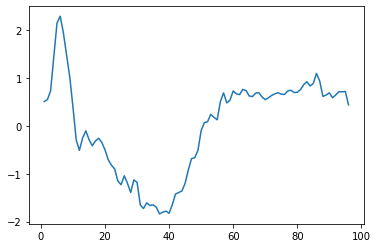

In [18]:
sns.lineplot(data=X_train.loc[0])

<AxesSubplot:>

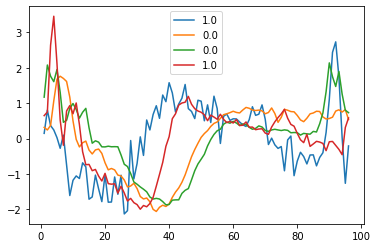

In [19]:
sns.lineplot(data=X_train.loc[1], label=y_train.loc[1])
sns.lineplot(data=X_train.loc[2], label=y_train.loc[2])
sns.lineplot(data=X_train.loc[3], label=y_train.loc[3])
sns.lineplot(data=X_train.loc[4], label=y_train.loc[4])


In [20]:
pipe = Pipeline(steps=(('scaler',StandardScaler()), ('model',LogisticRegression())))

In [21]:
pipe_parameters = {'model__penalty':['l1'],
                   'model__solver':['liblinear'],
                   'model__l1_ratio': list(np.logspace(-5,-1, 5)) + list(np.linspace(1e-1,1,10)) + list(np.linspace(2,10,9)) + list(np.logspace(2, 5, 4))}

pipe_grid = GridSearchCV(estimator=pipe, param_grid=pipe_parameters, cv=10, verbose=5, n_jobs=-1)

pipe_grid.fit(X_train, y_train)

print("pipe best parameters: ", pipe_grid.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.2s


pipe best parameters:  {'model__l1_ratio': 1e-05, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    2.0s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [22]:
pipe_results = pd.DataFrame(pipe_grid.cv_results_)
pipe_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.008635      0.004445         0.002334        0.000397   
1        0.027290      0.012218         0.005350        0.001616   
2        0.036775      0.010660         0.004329        0.001691   
3        0.019415      0.014634         0.004523        0.001960   
4        0.034738      0.015506         0.005471        0.001963   
5        0.036921      0.011727         0.007270        0.002559   
6        0.040321      0.011924         0.007139        0.001638   
7        0.040756      0.010764         0.006731        0.001628   
8        0.042563      0.010821         0.006866        0.001594   
9        0.034809      0.015979         0.006118        0.001782   
10       0.040528      0.011897         0.006382        0.001872   
11       0.045243      0.007325         0.007038        0.000860   
12       0.036889      0.013172         0.005442        0.001830   
13       0.037845      0.012487         0.006388        0.001465   
14       0.040873      0.003438         0.006972        0.001426   
15       0.031250      0.011613         0.005725        0.001597   
16       0.035267      0.010549         0.007551        0.001556   
17       0.029783      0.014791         0.004512        0.001614   
18       0.042120      0.011986         0.006505        0.001763   
19       0.042978      0.018115         0.006437        0.001701   
20       0.030289      0.019230         0.004971        0.002258   
21       0.038378      0.008548         0.006772        0.001466   
22       0.040413      0.001520         0.007055        0.000994   
23       0.034883      0.010258         0.007554        0.002336   
24       0.041003      0.003366         0.007611        0.000850   
25       0.033883      0.010550         0.006370        0.001169   
26       0.034488      0.012043         0.006707        0.002115   
27       0.030828      0.012680         0.005531        0.001836   

   param_model__l1_ratio param_model__penalty param_model__solver  \
0                  1e-05                   l1           liblinear   
1                 0.0001                   l1           liblinear   
2                  0.001                   l1           liblinear   
3                   0.01                   l1           liblinear   
4                    0.1                   l1           liblinear   
5                    0.1                   l1           liblinear   
6                    0.2                   l1           liblinear   
7                    0.3                   l1           liblinear   
8                    0.4                   l1           liblinear   
9                    0.5                   l1           liblinear   
10                   0.6                   l1           liblinear   
11                   0.7                   l1           liblinear   
12                   0.8                   l1           liblinear   
13                   0.9                   l1           liblinear   
14                     1                   l1           liblinear   
15                     2                   l1           liblinear   
16                     3                   l1           liblinear   
17                     4                   l1           liblinear   
18                     5                   l1           liblinear   
19                     6                   l1           liblinear   
20                     7                   l1           liblinear   
21                     8                   l1           liblinear   
22                     9                   l1           liblinear   
23                    10                   l1           liblinear   
24                   100                   l1           liblinear   
25                  1000                   l1           liblinear   
26                 10000                   l1           liblinear   
27                100000                   l1           liblinear   

                             

In [23]:
%%time
best_pipe = pipe_grid.best_estimator_
best_pipe.fit(X_train, y_train)
pipe_prediction = best_pipe.predict(X_test)
confusion_matrix(y_test, pipe_prediction)

CPU times: user 9.93 ms, sys: 1.49 ms, total: 11.4 ms
Wall time: 10.3 ms


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


array([[28,  8],
       [ 8, 56]])

In [24]:
accuracy_score(y_test, pipe_prediction)

0.84

In [25]:
best_pipe["model"].coef_

array([[-0.14788805,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.81611462,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.81049879,  0.31988995,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.76845136,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.69081689,
         0.        , -0.30530531,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

b) Comment on the regression coefficients. Is there any interesting information? Try to interpret the model.

The results of cross validation is certainly interesting. All the parameters I have tried seems to give the same exact score, which is 0.83. Accuracy score of 0.82 on the test set tells me that there is not much overfitting. 

Most coefficients are 0, which is really weird since each observation is a time series. I believe this indicates that this time series can be mostly explained by the values at the moments that have a coefficient.

It also means that the model does not use any information from most of our features, which means the model can be changed to fit the data better.

c) Suppose you take the difference between consecutive time series observations to transform the time
series. Let x_t be the observation at time point t and you are asked to create a new time series which is
y_t = x_t − x_t-1 for t = 2,3, … , T where T is the length of the time series. Perform the same operation in
part (a) for this newly created dataset and compare the results.

In [26]:
X_train_diff = X_train.diff(axis=1).drop(1,1)
X_test_diff = X_test.diff(axis=1).drop(1,1)

<AxesSubplot:>

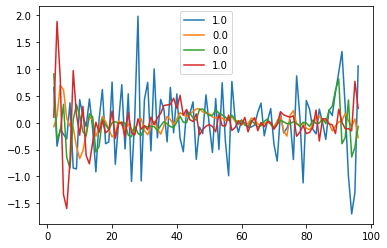

In [27]:
sns.lineplot(data=X_train_diff.loc[1], label=y_train.loc[1])
sns.lineplot(data=X_train_diff.loc[2], label=y_train.loc[2])
sns.lineplot(data=X_train_diff.loc[3], label=y_train.loc[3])
sns.lineplot(data=X_train_diff.loc[4], label=y_train.loc[4])


It is weird that our new features show more variability than our original time series. However, these features are closer to having stationary means.

In [28]:
pipe_parameters = {'model__penalty':['l1'],
                   'model__solver':['liblinear'],
                   'model__l1_ratio': list(np.logspace(-5,-1, 5)) + list(np.linspace(1e-1,1,10)) + list(np.linspace(2,10,9)) + list(np.logspace(2, 5, 4))}

pipe_grid = GridSearchCV(estimator=pipe, param_grid=pipe_parameters, cv=10, verbose=5, n_jobs=-1)

pipe_grid.fit(X_train_diff, y_train)

print("pipe best parameters: ", pipe_grid.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.1s


pipe best parameters:  {'model__l1_ratio': 1e-05, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 265 out of 280 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    2.0s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [29]:
pipe_results = pd.DataFrame(pipe_grid.cv_results_)
pipe_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.015410      0.011785         0.003600        0.001836   
1        0.043503      0.009783         0.006814        0.002420   
2        0.027416      0.015328         0.004371        0.001582   
3        0.033319      0.017491         0.006416        0.001901   
4        0.035940      0.009989         0.007104        0.001363   
5        0.044747      0.006051         0.006551        0.000910   
6        0.040022      0.008550         0.006619        0.000986   
7        0.026166      0.013953         0.005520        0.001314   
8        0.035621      0.010182         0.006690        0.001843   
9        0.034667      0.014248         0.006381        0.001801   
10       0.038632      0.007270         0.007211        0.001366   
11       0.040517      0.002127         0.008057        0.001079   
12       0.037551      0.007884         0.007083        0.000542   
13       0.040265      0.008486         0.006854        0.001052   
14       0.040162      0.008958         0.006197        0.001503   
15       0.040364      0.009263         0.007273        0.001907   
16       0.039723      0.012282         0.007131        0.002032   
17       0.036177      0.014018         0.005050        0.001774   
18       0.032876      0.018124         0.005307        0.002047   
19       0.031845      0.012632         0.005782        0.001938   
20       0.031121      0.016716         0.005334        0.001845   
21       0.037788      0.011000         0.006216        0.001632   
22       0.036919      0.013388         0.005915        0.001792   
23       0.040353      0.012447         0.006534        0.001087   
24       0.041395      0.009127         0.007200        0.001344   
25       0.041306      0.001903         0.007156        0.000633   
26       0.033174      0.010755         0.006678        0.001089   
27       0.031855      0.011222         0.006321        0.001903   

   param_model__l1_ratio param_model__penalty param_model__solver  \
0                  1e-05                   l1           liblinear   
1                 0.0001                   l1           liblinear   
2                  0.001                   l1           liblinear   
3                   0.01                   l1           liblinear   
4                    0.1                   l1           liblinear   
5                    0.1                   l1           liblinear   
6                    0.2                   l1           liblinear   
7                    0.3                   l1           liblinear   
8                    0.4                   l1           liblinear   
9                    0.5                   l1           liblinear   
10                   0.6                   l1           liblinear   
11                   0.7                   l1           liblinear   
12                   0.8                   l1           liblinear   
13                   0.9                   l1           liblinear   
14                     1                   l1           liblinear   
15                     2                   l1           liblinear   
16                     3                   l1           liblinear   
17                     4                   l1           liblinear   
18                     5                   l1           liblinear   
19                     6                   l1           liblinear   
20                     7                   l1           liblinear   
21                     8                   l1           liblinear   
22                     9                   l1           liblinear   
23                    10                   l1           liblinear   
24                   100                   l1           liblinear   
25                  1000                   l1           liblinear   
26                 10000                   l1           liblinear   
27                100000                   l1           liblinear   

                             

In [30]:
%%time
best_pipe = pipe_grid.best_estimator_
best_pipe.fit(X_train_diff, y_train)
pipe_prediction = best_pipe.predict(X_test_diff)
confusion_matrix(y_test, pipe_prediction)

CPU times: user 9.27 ms, sys: 1.16 ms, total: 10.4 ms
Wall time: 9.62 ms


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


array([[30,  6],
       [10, 54]])

In [31]:
accuracy_score(y_test, pipe_prediction)

0.84

In [32]:
best_pipe["model"].coef_

array([[ 0.01128861,  0.44327704,  0.        , -0.54584239,  0.        ,
         0.        ,  0.48166619,  0.        ,  0.43961956,  0.        ,
         0.40032595, -0.03123073, -0.17420868,  0.        ,  0.        ,
         0.        ,  0.        , -0.24760742,  0.        , -0.20277069,
         0.        ,  0.        , -0.15762506, -0.07683396,  0.        ,
        -0.51693256,  0.        , -0.62963072, -0.21858233,  0.        ,
         0.24913882,  0.        ,  0.        ,  0.        ,  0.30154525,
         0.14910494,  0.        ,  0.        ,  0.35331869,  0.        ,
         0.        ,  0.        ,  0.24603481,  0.        ,  0.        ,
        -0.55581742,  0.        , -0.10744602,  0.        ,  0.59468043,
         0.        ,  0.        ,  0.        ,  0.        , -0.47951281,
         0.        ,  0.        ,  0.17125947,  0.        ,  0.        ,
         0.        ,  0.        ,  0.02931092,  0.        ,  0.        ,
         0.        ,  0.        , -0.1206751 ,  0.0

d) Comment on the regression coefficients for the model trained on the new dataset. Is there any interesting
information? Try to interpret the model.

These results are really getting weird. The cross-validation mean test score is still same for all the model parameters I have tried, and the results are worse than the previous model. However, the test prediction is slightly better with 0.84. That's 2% percent improvement.

There are a lot more features with coefficients in this case, which makes sense since each feature now contains information about two features from the previous model.

e) Suppose you combine two datasets created for part (a) and (c) column wise and train the model on the
combined dataset. Use the learned model on the combined dataset to predict the class for test data.
Present your results in a (2-by-2) confusion matrix.

In [33]:
X_train_diff.columns = X_train_diff.columns.map(lambda x: str(x) + 'd')

In [34]:
X_train_combined = pd.concat([X_train, X_train_diff],1)
X_test_combined = pd.concat([X_test, X_test_diff],1)

In [35]:
pipe_parameters = {'model__penalty':['l1'],
                   'model__solver':['liblinear'],
                   'model__l1_ratio': list(np.logspace(-5,-1, 5)) + list(np.linspace(1e-1,1,10)) + list(np.linspace(2,10,9)) + list(np.logspace(2, 5, 4))}

pipe_grid = GridSearchCV(estimator=pipe, param_grid=pipe_parameters, cv=10, verbose=5, n_jobs=-1)

pipe_grid.fit(X_train_combined, y_train)

print("pipe best parameters: ", pipe_grid.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.1s


pipe best parameters:  {'model__l1_ratio': 1e-05, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 265 out of 280 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    2.2s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [36]:
pipe_results = pd.DataFrame(pipe_grid.cv_results_)
pipe_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.021853      0.010566         0.004384        0.000696   
1        0.021315      0.011413         0.004955        0.001177   
2        0.018712      0.010031         0.004731        0.000669   
3        0.030474      0.013731         0.005210        0.001842   
4        0.032069      0.013250         0.005536        0.002109   
5        0.034441      0.017812         0.005965        0.001656   
6        0.038802      0.013884         0.006320        0.002845   
7        0.029781      0.015396         0.005371        0.001611   
8        0.025211      0.013773         0.004313        0.000512   
9        0.037244      0.010958         0.005529        0.001555   
10       0.020775      0.013047         0.004602        0.001148   
11       0.032125      0.014047         0.004944        0.001807   
12       0.040475      0.013968         0.007383        0.002221   
13       0.045484      0.011621         0.006919        0.002127   
14       0.047347      0.012393         0.007954        0.001941   
15       0.041585      0.014128         0.006547        0.002428   
16       0.042836      0.012757         0.007573        0.002850   
17       0.048621      0.007704         0.007477        0.001935   
18       0.046803      0.010155         0.007721        0.002446   
19       0.041220      0.007981         0.008609        0.001691   
20       0.046739      0.006493         0.007998        0.001602   
21       0.033052      0.020481         0.006267        0.002262   
22       0.035565      0.016783         0.006228        0.001870   
23       0.041890      0.010312         0.008264        0.001767   
24       0.048741      0.006813         0.008641        0.001191   
25       0.043981      0.014373         0.007841        0.002311   
26       0.041476      0.013024         0.007324        0.001700   
27       0.031746      0.009661         0.005948        0.001645   

   param_model__l1_ratio param_model__penalty param_model__solver  \
0                  1e-05                   l1           liblinear   
1                 0.0001                   l1           liblinear   
2                  0.001                   l1           liblinear   
3                   0.01                   l1           liblinear   
4                    0.1                   l1           liblinear   
5                    0.1                   l1           liblinear   
6                    0.2                   l1           liblinear   
7                    0.3                   l1           liblinear   
8                    0.4                   l1           liblinear   
9                    0.5                   l1           liblinear   
10                   0.6                   l1           liblinear   
11                   0.7                   l1           liblinear   
12                   0.8                   l1           liblinear   
13                   0.9                   l1           liblinear   
14                     1                   l1           liblinear   
15                     2                   l1           liblinear   
16                     3                   l1           liblinear   
17                     4                   l1           liblinear   
18                     5                   l1           liblinear   
19                     6                   l1           liblinear   
20                     7                   l1           liblinear   
21                     8                   l1           liblinear   
22                     9                   l1           liblinear   
23                    10                   l1           liblinear   
24                   100                   l1           liblinear   
25                  1000                   l1           liblinear   
26                 10000                   l1           liblinear   
27                100000                   l1           liblinear   

                             

In [37]:
%%time
best_pipe = pipe_grid.best_estimator_
best_pipe.fit(X_train_combined, y_train)
pipe_prediction = best_pipe.predict(X_test_combined)
confusion_matrix(y_test, pipe_prediction)

CPU times: user 16.9 ms, sys: 1.85 ms, total: 18.7 ms
Wall time: 13.9 ms


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "


array([[29,  7],
       [ 9, 55]])

In [38]:
accuracy_score(y_test, pipe_prediction)

0.84

In [39]:
best_pipe["model"].coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.93605731,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.72447412,  0.26907875,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.58076815,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00511925,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

f) Comment on the regression coefficients for the model trained on the new dataset. Is there any interesting
information? Try to interpret the model.

The results did not improve, they are still around 0.84. The cross-validation results now give 2 different mean test scores though, which are 0.80 and 0.79. This is still lower than what we got in our first model.

Most coefficients that are not 0 seems to belong to X_train_diff. This is an interesting observation.